Lab 2: Analyze statistical data using Python/R programming

Objective:

Perform statistical data analysis such as: Estimators of the main statistical measures (mean, variance, standard deviation, covariance correlation, standard error), Main distributions ( Normal distribution, chi-square distribution), Hypothesis testing, pair-wise association (Pearson correlation test, t-test, ANOVA), Non-parametric test (Spearman rank0)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np

In [5]:
lic = pd.read_csv("/content/drive/MyDrive/dataset_da/federal-firearm-licensees.csv")
lic

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (1,2,3,4,6,12,17) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Unnamed: 0,Lic Regn,Lic Dist,Lic Cnty,Lic Type,Lic Xprdte,Lic Seqn,License Name,Business Name,Premise Street,Premise City,Premise State,Premise Zip Code,Mail Street,Mail City,Mail State,Mail Zip Code,Voice Phone
0,0,--------,--------,--------,--------,----------,--------,----------------------------------------------...,----------------------------------------------...,----------------------------------------------...,---------------------------,-------------,----------------,----------------------------------------------...,---------------------------,----------,-------------,-----------
1,1,1,66,003,01,7L,00150,"SALAZAR-MORET, CHARLES",AGUADA SPORT SHOP & ARMORY,BO ASOMANTE CARR 115 KM 24-5,AGUADA,PR,00602,CALLE COLON #4 SUITE 3,AGUADA,PR,00602,7878686682
2,2,1,66,003,01,8F,00258,"HERNANDEZ-MUNOZ, GILBERTO",ARMERIA Y ACCESORIOS EL NARANJAL,CARR 411 KM 1.0 BO GUAYABO SECTOR BAJURA,AGUADA,PR,00602,4 REPTO MINERVA,AGUADA,PR,00602,7878680125
3,3,1,66,003,08,8H,00285,"SALAZAR MORET, CHARLES",AGUADA SPORT SHOP,BO ASOMANTE CARR 115 KM 24-5,AGUADA,PR,00602,CALLE COLON #4 SUITE 3,AGUADA,PR,00602,7878686682
4,4,1,66,005,01,9M,00224,"CARDONA-VALENTIN, VIRGINIA",SHOOTING ACCESSORIES & SERVICE,BO PALMAR CARR 111 KM 1.8,AGUADILLA,PR,00603,HC 2 BOX 20554,AGUADILLA,PR,00603,7876587174
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80186,80186,9.0,92.0,280.0,1.0,9H,4379.0,"ANGERMAN'S, INC",NaN,2 FRONT ST,WRANGELL,AK,999290000.0,PO BOX 928,WRANGELL,AK,999290000,9078743640.0
80187,80187,9.0,92.0,280.0,1.0,9B,771.0,OTTESEN'S INC,OTTESEN'S TRUE VALUE,104 FRONT ST,WRANGELL,AK,999290000.0,PO BOX 81,WRANGELL,AK,999290000,9078743377.0
80188,80188,9.0,92.0,280.0,1.0,0G,33533.0,"PRUNELLA, STEVE",NaN,2 MILE ZIMOVIA HWY,WRANGELL,AK,999290000.0,PO BOX 2157,WRANGELL,AK,999290000,9078743093.0
80189,80189,9.0,92.0,280.0,1.0,9H,35237.0,"MCCLOSKEY, ARLEN DOUGLAS",MCCLOSKEYS CUSTOM METAL WORK,110 SECOND AVE,WRANGELL,AK,999290000.0,PO BOX 493,WRANGELL,AK,999290000,9078742633.0


In [6]:
lic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80191 entries, 0 to 80190
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        80191 non-null  int64 
 1   Lic Regn          80190 non-null  object
 2   Lic Dist          80190 non-null  object
 3   Lic Cnty          80190 non-null  object
 4   Lic Type          80190 non-null  object
 5   Lic Xprdte        80190 non-null  object
 6   Lic Seqn          80190 non-null  object
 7   License Name      80191 non-null  object
 8   Business Name     52423 non-null  object
 9   Premise Street    80190 non-null  object
 10  Premise City      80190 non-null  object
 11  Premise State     80190 non-null  object
 12  Premise Zip Code  80190 non-null  object
 13  Mail Street       80190 non-null  object
 14  Mail City         80189 non-null  object
 15  Mail State        80190 non-null  object
 16  Mail Zip Code     80190 non-null  object
 17  Voice Phone 

In [7]:
lic.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,80191.0,40095.0,23149.292055,0.0,20047.5,40095.0,60142.5,80190.0


In [9]:
lic.drop('Unnamed: 0',axis=1,inplace=True)

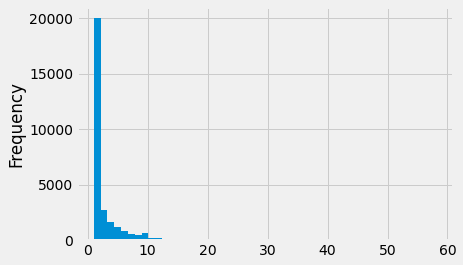

In [10]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
lic['Premise Zip Code'].value_counts().plot.hist(bins=50)

In [13]:
lic['Premise Zip Code'].value_counts().mean()

2.756617394293572

Here are our hypotheses:

H0:n¯=2.75
 
Ha:n¯≠2.75
 
Let's set our p-level to 0.05. That is, let's say that we're willing to accept a 5% risk that when we reject the null hypothesis we are wrong.

Now we will implement our t-test.

In [50]:
lic['Premise Zip Code'].value_counts().mean()

2.756617394293572

In [51]:
X = lic['Premise Zip Code'].value_counts()

In [52]:
import numpy as np
import scipy.stats as stats

def t_value(X, h_0):
    se = np.sqrt(np.var(X) / len(X))
    return (np.mean(X) - h_0) / se

def p_value(t):
    # Two-sided p-value, so we multiply by 2.
    return stats.norm.sf(abs(t))*2

t = t_value(X, 2.75)
p = p_value(t)

In [53]:
t,p

(0.3570237643291454, 0.7210740152175236)

In [54]:
import scipy.stats as stats

stats.ttest_1samp(a=X, popmean=2.75)

Ttest_1sampResult(statistic=0.35701762773872997, pvalue=0.7210811989731936)

The  t  score tells us that our result is 0.36 standard deviations away from the average mean estimator result we can expect. 0.36 standard deviations is not a lot at all though! Our  p  value tells us that almost 72% of possible mean estimate values are further away from our expectation than the value that we got.

In other words, a mean value of 2.75 is in the 72nd percentile of closeness.

Since  0.72>0.05 , we fail to reject the null hypothesis  H0 . We conclude that there is strong evidence that  n¯=2.75 —that is, that the mean number of gun shops per US Zip Code is almost 3!

Example in document

In [57]:
def t_value(var,n,m, h_0):
    se = np.sqrt(var / n)
    return (m - h_0) / se

def p_value(t):
    # Two-sided p-value, so we multiply by 2.
    return stats.norm.sf(abs(t))*2

Here are our hypotheses:

H0:n¯=30
 
Ha:n¯< 30

In [58]:
n=10
m=27
v=20
alp = 0.05
h = 30

In [59]:
t = t_value(v,n,m,h)
p = p_value(t)

In [60]:
t,p

(-2.1213203435596424, 0.03389485352468927)

Our p value tells us that almost 3% of possible mean estimate values are further away from our expectation than the value that we got.

Since 0.034 < 0.05 , we reject the null hypothesis H0 . We conclude that there is evidence that u¯< 30.

## Inference:

Descriptive statistics are brief descriptive coefficients that summarize a given data set, which can be either a representation of the entire population or a sample of a population. Descriptive statistics are broken down into measures of central tendency and measures of variability (spread). Measures of central tendency include the mean, median, and mode, while measures of variability include standard deviation, variance, minimum and maximum variables, kurtosis, and skewness. The most recognized types of descriptive statistics are measures of center: the mean, median, and mode, which are used at almost all levels of math and statistics.

Hypothesis testing is an act in statistics whereby an analyst tests an assumption regarding a population parameter. The methodology employed by the analyst depends on the nature of the data used and the reason for the analysis. Hypothesis testing is used to assess the plausibility of a hypothesis by using sample data. Such data may come from a larger population, or from a data-generating process.

In the above two examples, we defined the null hypothesis and the alternate hypothesis and based on the resulting p-value from the test we decide whether to accept the null hypothesis or reject it with marginal or significant evidence and for this a level of significance is set, which was 0.05 in the above two examples. Thus if in any case the p-value is less than this alpha value then the null hypothesis can be rejected otherwise there is no seignificant evidence to deny the null hypothesis.

